In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv("student_exam_data.csv") 

In [37]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Контрольная 1         300 non-null    int64 
 1   Контрольная 2         300 non-null    int64 
 2   Контрольная 3         300 non-null    int64 
 3   Сон накануне          300 non-null    object
 4   Настроение            300 non-null    object
 5   Энергетиков накануне  300 non-null    object
 6   Посещаемость занятий  300 non-null    object
 7   Время подготовки      300 non-null    object
 8   Сдал                  300 non-null    object
dtypes: int64(3), object(6)
memory usage: 21.2+ KB


In [38]:
df.columns

Index(['Контрольная 1', 'Контрольная 2', 'Контрольная 3', 'Сон накануне',
       'Настроение', 'Энергетиков накануне', 'Посещаемость занятий',
       'Время подготовки', 'Сдал'],
      dtype='object')

In [39]:
df.head() # первые 5 строк df

,Контрольная 1,Контрольная 2,Контрольная 3,Сон накануне,Настроение,Энергетиков накануне,Посещаемость занятий,Время подготовки,Сдал
0,4,4,9,Нет,Хорошее,4+,Низкая,За неделю,Нет
1,9,9,6,Да,Плохое,1,Средняя,Последний час,Да
2,8,6,9,Да,Хорошее,2-3,Средняя,Последний час,Да
3,8,4,9,Да,Хорошее,1,Высокая,Последняя ночь,Да
4,9,10,4,Нет,Нормальное,1,Низкая,Последний час,Да


<Axes: xlabel='Сдал'>

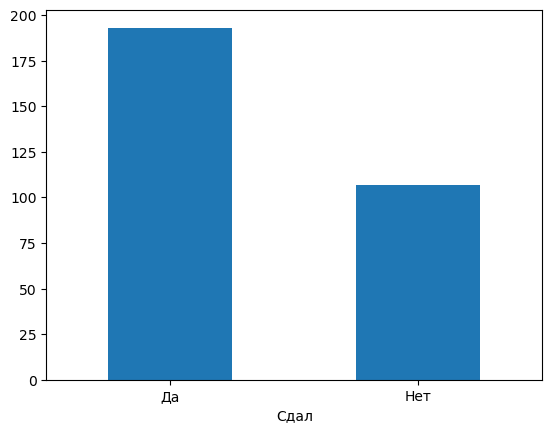

In [40]:
df['Сдал'].value_counts().plot(kind = 'bar', rot = 0) #проверяю на дизбаланс классов

# Data Preprocessing

In [41]:
encoder = OrdinalEncoder()
df[["Настроение", "Посещаемость занятий", "Время подготовки"]] = \
encoder.fit_transform(df[["Настроение", "Посещаемость занятий", "Время подготовки"]]) 
#Кодирую ранговые переменные

In [42]:
df['Сон накануне'] = df['Сон накануне'].map({'Нет':0, 'Да': 1})
# Кодирую сон накануне, как 0, если не спал или 1, если спал

In [43]:
df['Энергетиков накануне'].unique()
#Узнаю какие уникальные значения количества выпитых энергетиков есть в таблице

array(['4+', '1', '2-3', '0'], dtype=object)

In [44]:
df['Энергетиков накануне'] = df['Энергетиков накануне'].map({'0': 0 ,'1': 1 ,'2-3': 2 ,'4+': 3})
#Кодирую количество выпитых энергетиков

In [45]:
df['Сдал'] = df['Сдал'].map({'Нет': 0 , 'Да': 1})
#Кодирую исход экзамена 0 — не сдал, 1 — сдал 

In [46]:
df #проверил что вышло

,Контрольная 1,Контрольная 2,Контрольная 3,Сон накануне,Настроение,Энергетиков накануне,Посещаемость занятий,Время подготовки,Сдал
0,4,4,9,0,2.0,3,1.0,0.0,0
1,9,9,6,1,1.0,1,2.0,2.0,1
2,8,6,9,1,2.0,2,2.0,2.0,1
3,8,4,9,1,2.0,1,0.0,3.0,1
4,9,10,4,0,0.0,1,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...
295,9,10,6,0,1.0,3,0.0,3.0,0
296,4,6,7,0,0.0,1,1.0,3.0,0
297,10,6,6,1,1.0,3,0.0,2.0,1
298,6,4,5,0,0.0,0,2.0,0.0,0


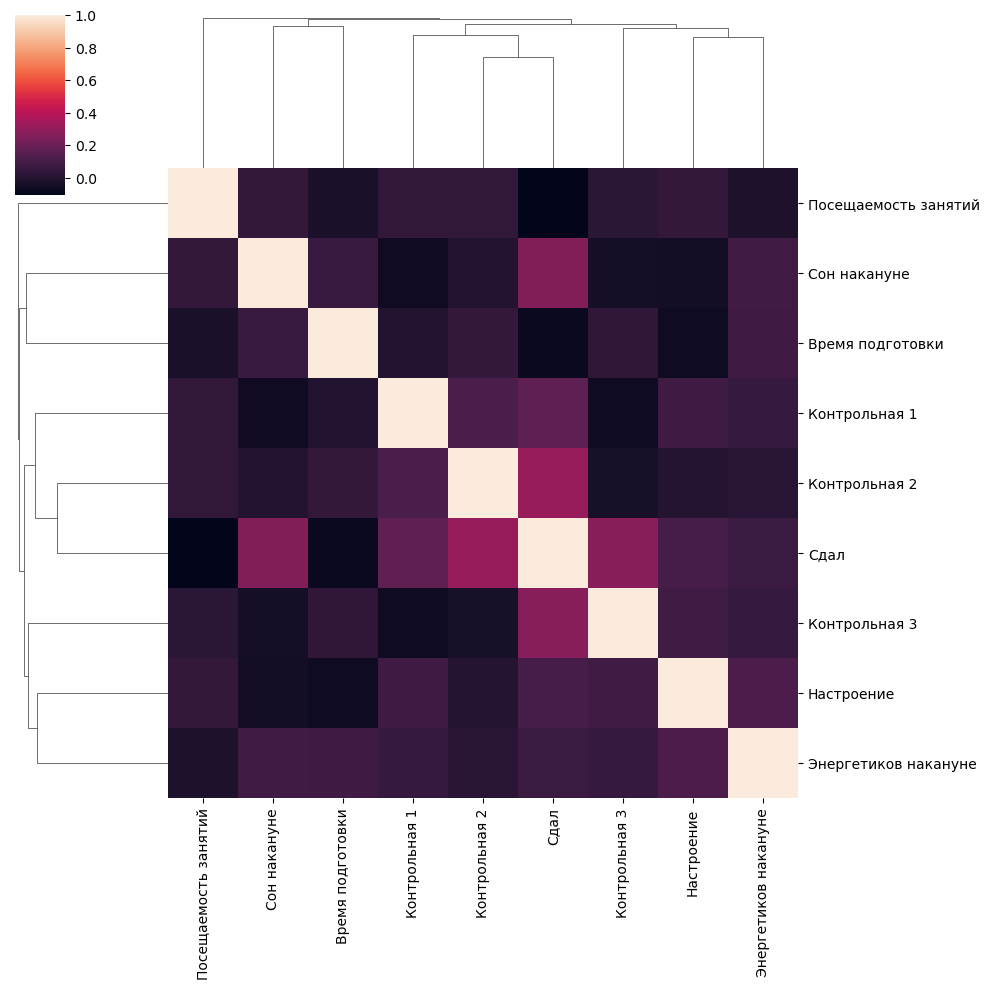

In [47]:
sns.clustermap(df.corr())

In [48]:
X = df.drop('Сдал', axis= 1)
y = df['Сдал']
#Разделяю данные на X — независимую переменную и на y — зависимую (предсказываемую)

In [49]:
X.head()

,Контрольная 1,Контрольная 2,Контрольная 3,Сон накануне,Настроение,Энергетиков накануне,Посещаемость занятий,Время подготовки
0,4,4,9,0,2.0,3,1.0,0.0
1,9,9,6,1,1.0,1,2.0,2.0
2,8,6,9,1,2.0,2,2.0,2.0
3,8,4,9,1,2.0,1,0.0,3.0
4,9,10,4,0,0.0,1,1.0,2.0


In [50]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Сдал, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, shuffle = True)

## TREE

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
tree = DecisionTreeClassifier()

In [54]:
param_grid = {
    'max_depth': range(20),
    'min_samples_split': range(10),
    'min_samples_leaf': range(10),
    'criterion': ['gini', 'entropy']
         }

In [55]:
grid_search = GridSearchCV(estimator = tree, param_grid = param_grid, scoring = 'accuracy', cv = 10, n_jobs= -1)

In [56]:
grid_search.fit(X_train,y_train)

e:\AnacondaML\envs\ml_course\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
12640 fits failed out of a total of 40000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "e:\AnacondaML\envs\ml_course\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\AnacondaML\envs\ml_course\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "e:\AnacondaML\envs\ml_course\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "e:\AnacondaML\envs\

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 20),
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 10)},
             scoring='accuracy')

In [57]:
print(f'Best params: {grid_search.best_params_}')
print(f'Score: {grid_search.best_score_}')

Best params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3}
Score: 0.8980237154150197


In [58]:
best_tree = grid_search.best_estimator_
best_tree.score(X_test,y_test)

0.84

## SVM

In [59]:
from sklearn.svm import SVC

In [60]:
model = SVC()
param_grid = {
    'C': range(10,15),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5],
    'class_weight': [None, 'balanced'],
    'shrinking': [True, False]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Результаты
print("Best params:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best params: {'C': 14, 'class_weight': 'balanced', 'coef0': 0.5, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'shrinking': True}
Best accuracy: 0.8907602339181286


In [61]:
SVM_best_estimator = grid_search.best_estimator_

In [62]:
SVM_best_estimator.score(X_test,y_test)

0.8666666666666667

## BOOSTING

In [63]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
model = CatBoostClassifier(
    cat_features=[], 
    silent=True,       
    early_stopping_rounds=50
)

In [65]:
param_grid = {
    'depth': [4, 6, 8],          
    'learning_rate': [0.01, 0.1], 
    'iterations': [300, 500],    
    'l2_leaf_reg': [1, 3, 5, 10]      
}

In [66]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,             
    n_jobs=-1         
)

In [67]:
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

e:\AnacondaML\envs\ml_course\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "e:\AnacondaML\envs\ml_course\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\AnacondaML\envs\ml_course\lib\site-packages\catboost\core.py", line 5201, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "e:\AnacondaML\envs\ml_course\lib\site-packages\catboost\core.py

Best params: {'depth': 4, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Best accuracy: 0.9610451604798694


In [68]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.92


In [69]:
from sklearn.metrics import f1_score

# KFOLD

In [70]:
from sklearn.model_selection import cross_val_score
scores_boosted = cross_val_score(best_model, X, y, cv=5)

In [71]:
print(f"BOOSTED {scores_boosted.mean():.2f} ± {scores_boosted.std():.2f}")

BOOSTED 0.96 ± 0.02


In [72]:
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']